# Plotting MOF rates

### Loading modules

In [1]:
from matplotlib.pyplot import figure,show,plot,errorbar,subplots,xlabel,ylabel,subplots_adjust,savefig,gca,legend,xlim,annotate
from matplotlib import rc
from numpy import loadtxt,arange,array,sqrt,linspace,append
from mof_lattice import MOF_lattice,MOF_data,MOF
from os import listdir,getcwd,path,walk
from seaborn import color_palette,set_palette

In [2]:
color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [3]:
set_palette('colorblind')

In [4]:
%matplotlib notebook

#### Parameters
n: number of points <br/>
off: offset

In [5]:
n=100
off=0.0075

### Loading MOF calculated data

In [6]:
f=MOF("20")

### Temperature and chemical potential ranges

In [7]:
temp=linspace(f.path.min()-0.01,f.path.max()+0.01,n)
mu=f.mu*temp

### Calculating theoretical values

In [8]:
mof=MOF_lattice(f.length,f.E_s,f.E_m,f.E_t)
rho=mof.get_loading(mu,temp)

### Plotting the theoretical values

<IPython.core.display.Javascript object>


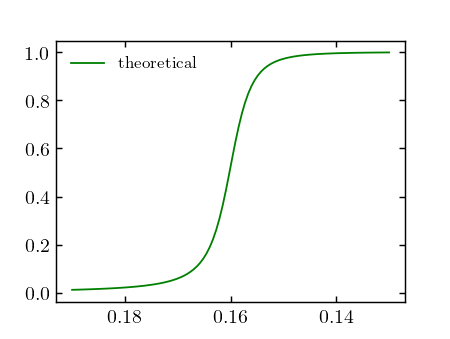

In [9]:
figure()
plot(temp,rho,'g-',linewidth=1.0,label=r"theoretical")
legend(frameon=False)
gca().invert_xaxis()
show()

### Folders to read

In [10]:
d=next(walk('.'))[1]
d=[a for a in d if a.isdigit()]
d=sorted(d,key=lambda x: int(x))
print(d)
d=['10','11','12','13','15','20']
d=d[::-1]
print(d)

['5', '10', '11', '12', '13', '15', '20']
['20', '15', '13', '12', '11', '10']


### Reading and plotting MOF data with various temperature ramp rates

<IPython.core.display.Javascript object>


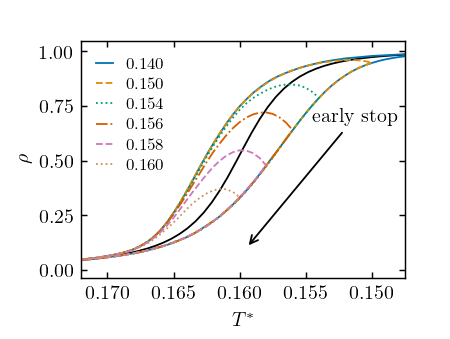

In [11]:
#plot(temp,rho,'g-',linewidth=1.0,label=r"theoretical")
fig,ax=subplots()

plot(temp,rho,'k-',linewidth=1.0)

ax.set_prop_cycle(color=color_palette('colorblind',6),linestyle=['-', '--', ':','-.','--',':'])

for a in d:
    f=MOF(a)
    #errorbar(f.path,f.rho.mean,yerr=sqrt(f.rho.var),linewidth=1.00,elinewidth=6.00,ecolor="y",barsabove=True,color="r",alpha=0.66)
    #ax1.vlines(f.path,ymin=f.rho.min,ymax=f.rho.max,linewidth=0.66,alpha=1.0)
    
    #l=float(f.isobar[0])/80.0*100
    t=(int(len(f.path)/2))
    l=(f.path[t-1])
    
    plot(f.path,f.rho.mean,
         #markersize=1.0,
         linewidth=1.0,
         #alpha=1.0,
         #label="$T^*={:.3f}$".format(l))
         label="${:.3f}$".format(l))

annotate(r"early stop",xy=(0.1595,0.1),xytext=(0.1545,0.7),
         arrowprops=dict(arrowstyle="->"),textcoords='data',va='center')

legend(frameon=False,loc=2,handlelength=1,labelspacing=0.2)
xlim(f.path.min()+off,f.path.max()-off)
xlim(0.1475,0.172)

gca().invert_xaxis()

xlabel(r"$T^*$")
ylabel(r"$\rho$")

subplots_adjust(left=0.18,bottom=0.18)
savefig("mof_quench.png")
savefig("mof_quench.pdf")

show()

In [12]:
import pandas as pd

In [21]:
xl_file=pd.ExcelFile('../e-2-Mg2dobpdc_hysteresis-tests_final.xlsx')

In [22]:
print(xl_file.sheet_names)

['quench', 'rates', 'bare-Mg2dobpdc', 'e-2-Mg2dobpdc']


#### Read columns fce

In [55]:
def read_columns(a=[0,1],b=[4,5]):
    a1=pd.read_excel(xl_file,sheet_name='quench',usecols=a,header=8)
    a2=pd.read_excel(xl_file,sheet_name='quench',usecols=b,header=8)

    T1,rho1=a1.values.transpose()
    T2,rho2=a2.values.transpose()
    
    T=append(T1,T2)
    rho=append(rho1,rho2)
    
    return T,rho

In [75]:
_T=[]
_rho=[]
cols=[
    {'a':[0,1],'b':[4,5]},
    {'a':[32,33],'b':[36,37]},
    {'a':[24,25],'b':[28,29]},
    {'a':[16,17],'b':[20,21]},
    {'a':[8,9],'b':[12,13]}  
     ]
for a in cols:
    T,rho=read_columns(a=a['a'],b=a['b'])
    _T+=[T]
    _rho+=[rho]

#### Reading data

<IPython.core.display.Javascript object>


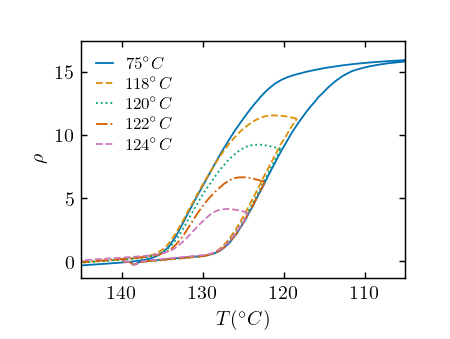

In [77]:
fig,ax=subplots()

ax.set_prop_cycle(color=color_palette('colorblind',6),linestyle=['-', '--', ':','-.','--',':'])

labels=['75','118','120','122','124']

for T,rho,label in zip(_T,_rho,labels):
    plot(T,rho,
         linewidth=1.0,
         label=label+"${^\circ}C$")

legend(frameon=False,loc=2,handlelength=1,labelspacing=0.2)
xlim(105,145)

gca().invert_xaxis()

xlabel(r"$T(^\circ C)$")
ylabel(r"$\rho$")

subplots_adjust(left=0.18,bottom=0.18)
savefig("mof_quench_exp.png")
savefig("mof_quench_exp.pdf")
    
show()